In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import copy
import pandas as pd

### Question 4

#### (a) 

We want to simulate 1000 points from the bivariate normal distribution N($\mu, \Sigma$), with

\begin{equation}
\mu = 0, \Sigma = \left(\begin{matrix} 
1 & 0 \\
0 & 1 
\end{matrix}\right)
\end{equation}
Plot the data. Pretend these two variables represent the features an app uses to characterizes
people's preferences and subsequently cluster them into 3 clusters.

In [3]:
np.random.seed(123)

mean = [0,0] #mean
cov = [[1,0],[0,1]] #the diagonal covariance

x = np.random.multivariate_normal(mean, cov, 1000)

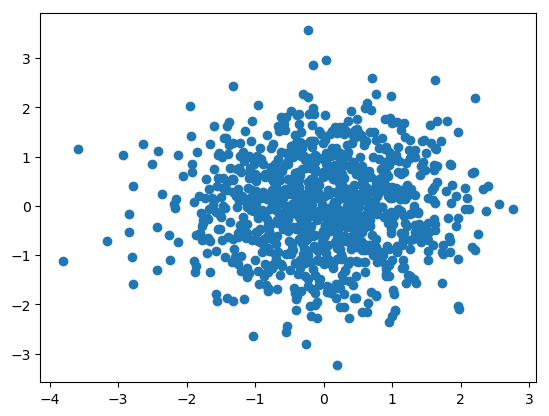

In [4]:

a = x[:,0]
b = x[:,1]
plt.scatter(a,b)
plt.show()

#### (b)
Using the python package sklearn.cluster.KMeans fit a 3 cluster model to the data. Plot the three cluster centers and color the data points according to the clusters they are assigned. This is the assignment the app has chosen for this population.

In [17]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(x)

y=kmeans.labels_


d:\anaconda3\envs\cse160\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
d:\anaconda3\envs\cse160\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
d:\anaconda3\envs\cse160\lib\site-packages\sklearn\metrics\pairw

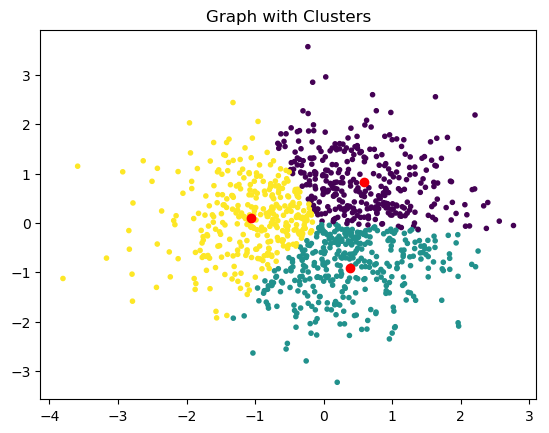

In [6]:
# Let's plot the three clusters and the centers

plt.title("Graph with Clusters")
plt.scatter(x[:, 0], x[:, 1], marker='.', c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c='red')
plt.show()


#### (c)
Here we modify the data points as: $ x_i = 0.99x_i + 0.01c_i$, with $c_i$ being the cluster center assigned to the $i$-th data point. This corresponds to a tiny indirect effect of the choice of cluster on the features of the people
in the sample. Now repeat the clustering on the modified data.

In [7]:
N,D = x.shape
new_x = np.zeros((N,D))
for i in range(N):
    new_x[i] = 0.99*x[i] + 0.01*kmeans.cluster_centers_[y[i]]
new_kmeans = KMeans(n_clusters=3).fit(new_x)
new_y = new_kmeans.labels_

d:\anaconda3\envs\cse160\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
d:\anaconda3\envs\cse160\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
d:\anaconda3\envs\cse160\lib\site-packages\sklearn\metrics\pairw

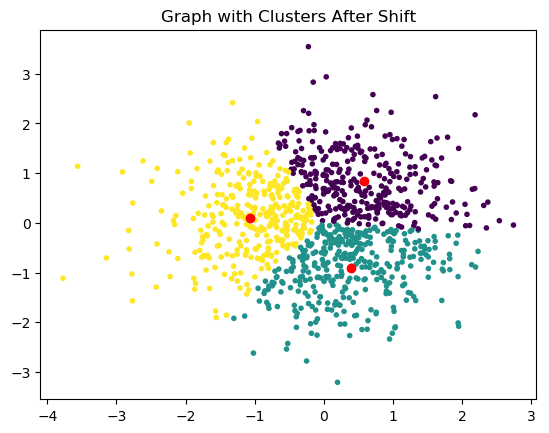

In [8]:
plt.title("Graph with Clusters After Shift")
plt.scatter(new_x[:, 0], new_x[:, 1], marker='.', c=new_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c='red')
plt.show()

#### (d)
Imagine the app repeats the clustering analysis every week based on the modified data. Repeat this process 50 times. Plot the original data cloud, and the final data cloud you obtained side by side. Describe what has happened to your original population of diverse individuals after a year (50 weeks).

In [9]:
prev = copy.deepcopy(x)
pred = copy.deepcopy(y)
for i in range(50): # in each of the 50 weeks
    for j in range(N):
        prev[j] = 0.99*prev[j] + 0.01*kmeans.cluster_centers_[pred[j]]
    kmeans = KMeans(n_clusters=3).fit(prev) # redo the clustering
    pred = kmeans.labels_ # update the cluster center

d:\anaconda3\envs\cse160\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
d:\anaconda3\envs\cse160\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
d:\anaconda3\envs\cse160\lib\site-packages\sklearn\metrics\pairw

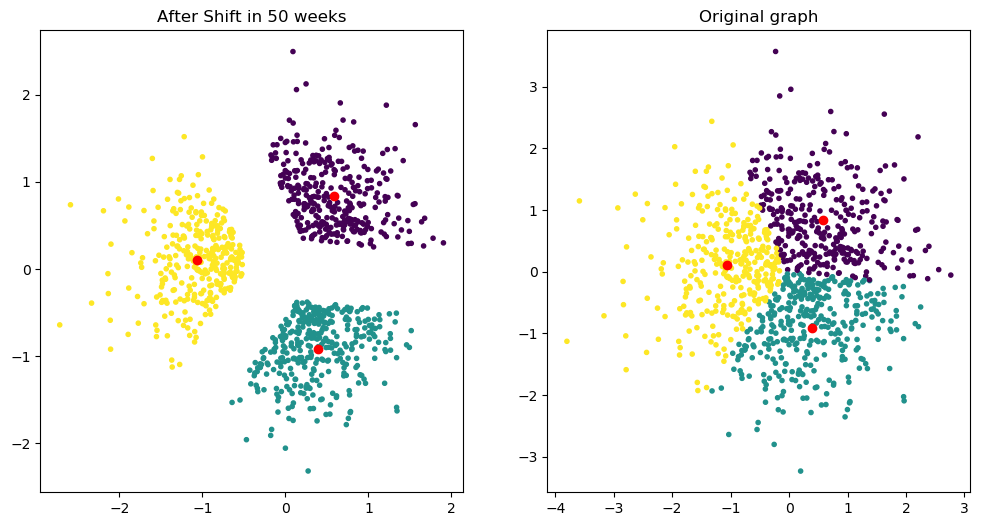

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.title("After Shift in 50 weeks")
plt.scatter(prev[:, 0], prev[:, 1], marker='.', c=pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c='red')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.title("Original graph")
plt.scatter(x[:, 0], x[:, 1], marker='.', c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c='red')
plt.show()


### Question 5

#### (a)
Write Python code that parses each SOU address, finding end-of-sentence markers.

In [4]:
import json
speeches=[]
with open('speeches.json') as f:
    for line in f:
        speeches.append(json.loads(line))

In [68]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize


# Function that uses the rules in the package of sent_tokenize and work_tokenize
# to parces a text; the funtion will return number of sentences and 
# mean sentence length
def parsing(text):
    sentences = sent_tokenize(text) # All the sentences
    num_sent = len(sentences) # Number of sentences
    words = word_tokenize(text) # All the words
    num_words = len(words) #Number of words
    avg_length = float(num_words)/float(num_sent) #Average length of the sentence
    return num_sent, avg_length

[nltk_data] Downloading package punkt to C:\Users\Anne
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### (b)
Which President has the longest sentences on average? Which has the shortest sentences? Compute the median, 25% and 75% quantiles across all Presidents. What was the longest and shortest sentence ever spoken (or written) in a SOU?

In [6]:
df = pd.DataFrame.from_dict(speeches, orient='columns')
df.describe()

,president,text,year
count,226,226,226
unique,41,226,223
top,Franklin D. Roosevelt,Fellow-Citizens of the Senate and House of Re...,1981
freq,12,1,2


In [7]:
# See what the df looks like
df

,president,text,year
0,James Monroe,Fellow-Citizens of the Senate and House of Re...,1821
1,William McKinley,To the Senate and House of Representatives:\r...,1897
2,Dwight D. Eisenhower,[Delivered in person before a joint session] \...,1960
3,Calvin Coolidge,Since the close of the last Congress the Natio...,1923
4,James Madison,Fellow-Citizens of the Senate and House of Re...,1816
...,...,...,...
221,Andrew Jackson,Fellow Citizens of the Senate and of the Hous...,1831
222,William J. Clinton,"Mr. Speaker, Mr. Vice President, Members of Co...",2000
223,John Tyler,To the Senate and House of Representatives of...,1842
224,Martin Van Buren,Fellow-Citizens of the Senate and House of Re...,1840


In [ ]:
# We see above there are 226 addresses in total
num_sent = np.zeros(226)
avg_length = np.zeros(226)

for i in range(226):
    SOU_add = df.at[i, "text"] 
    num_sent[i], avg_length[i] = parsing(SOU_add)

In [46]:
# Index of the min and max avg_length
pos_min = np.where(avg_length==min(avg_length))
pos_max = np.where(avg_length==max(avg_length))

In [50]:
print("President with minimum average sentences:")
print(df.at[int(pos_min[0]), "president"])

print("President with maximum average sentences:")
print(df.at[int(pos_max[0]), "president"])

President with minimum average sentences:
George W. Bush
President with maximum average sentences:
James Madison


In [59]:
print("median of average sentences length : ",
       np.percentile(avg_length, 50))
print("25th percentile of average sentences length : ",
       np.percentile(avg_length, 25))
print("75th percentile of average sentences length : ",
       np.percentile(avg_length, 75))

median of average sentences length :  34.36161616161616
25th percentile of average sentences length :  24.052881667688535
75th percentile of average sentences length :  39.488495879120876


In [105]:
def parsing1(text):
    sentences = sent_tokenize(text) # All the sentences
    long = max(sentences, key=len)
    short = min(sentences, key=len)
    return long, short

In [109]:
long_list = []
short_list = []
for i in range(226):
    SOU_add = df.at[i, "text"] 
    long_list.append(parsing1(SOU_add)[0])
    short_list.append(parsing1(SOU_add)[1])

In [129]:
list1 = [len(i) for i in long_list]
list2 = [len(i) for i in short_list]

print("The longest sentence is: ")
print(long_list[list1.index(max(list1))])


The longest sentence is: 
It shows that the ordinary revenues from all sources for the fiscal year ended June 30, 1883, amounted to $398,287,581.95, whereof there was received--

 

 

 

 

 From customs

 

 $214,706,496.93

 

 

 

 From internal revenue

 

 144,720,368.98

 

 

 

 From sales of public lands

 

 7,955,864.42

 

 

 

 From tax on circulation and deposits of national banks

 

 9,111,008.85

 

 

 

 From profits on coinage, bullion deposits, and assays

 

 4,460,205.17

 

 

 

 From other sources

 

 17,333,637.60

 

 

 

 

 Total

 

 

 

 398,287,581.95

 

 

 

 

 

 

For the same period the ordinary expenditures were:

 

 

 

 

 For civil expenses

 

 $22,343,285.76

 

 

 

 For foreign intercourse

 

 2,419,275.24

 

 

 

 For Indians

 

 7,362,590.34

 

 

 

 For Pensions

 

 66,012,573.64

 

 

 

 For the military establishment, including river and harbor

 improvements and arsenals

 

 48,911,382.93

 

 

 

 For the naval 

In [128]:
print("The shortest sentence is: ")
print(short_list[list2.index(min(list2))])

The shortest sentence is: 
.


The longest and shortest sentence seems a bit odd and can be improved with better parsing methods but run out of time to improve it.

#### (c)
For each year, compute the number of sentences in the address, and the mean sentence
length in words for that year. Plot these data and two linear regressions, one
plot for the number of sentences by year, another for the average sentence length by
year. Note that the definition of “word” and “sentence” is imprecise. You can experiment
with different parsing rules, and see if the results change qualitatively. Describe
the trends that you see, and give some explanation for them.

In [9]:
years = pd.to_numeric(df["year"]) #The years

In [10]:
# Write funtion to do linear regression
# The function takes input X and response Y and return the alpha and beta
def lin_reg(X, Y):
    
    beta = np.cov(X, Y, ddof = 1)[0][1]/np.var(X, ddof = 1)
    alpha = np.mean(Y) - beta * np.mean(X)
    # fitted = alpha + beta * X
    return([alpha, beta])

# The funtion takes in the coefficients of linear regression and returns the predicted response
def fitted(alpha, beta, X):
    
    return(alpha + beta * X)

In [11]:
#Y = average sentence length
mean_reg = lin_reg(years, avg_length)
print(mean_reg)
fitted_means = fitted(mean_reg[0], mean_reg[1], years)

#Y = number of sentences
num_reg = lin_reg(years, num_sent)
print(num_reg)
fitted_num = fitted(num_reg[0], num_reg[1], years)

[266.84597894369017, -0.12306490223819637]
[-1214.1050807236588, 0.7855113265089554]


Text(0.5, 1.0, 'Average Sentence Length')

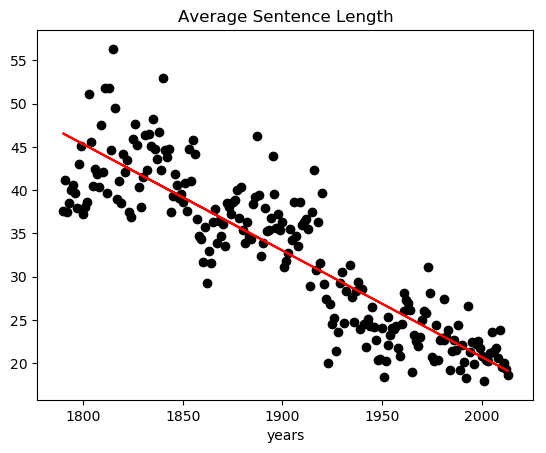

In [15]:
plt.plot(years, fitted_means, color = 'red')
plt.scatter(years, avg_length, color = 'black')
plt.xlabel("years")
plt.title("Average Sentence Length")

Text(0.5, 1.0, 'Number of Sentences')

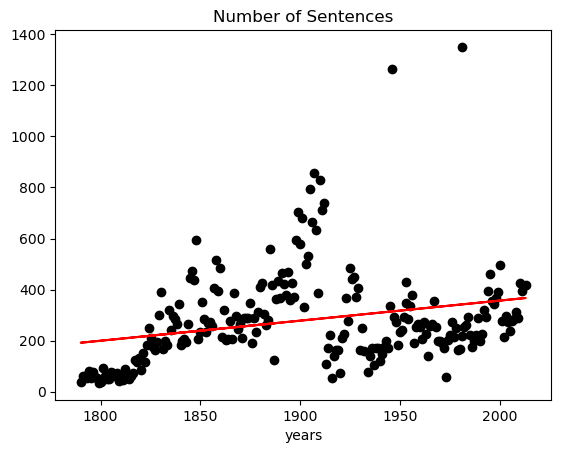

In [17]:
plt.plot(years, fitted_num, color = 'red')
plt.scatter(years, num_sent, color = 'black')
plt.xlabel("years")
plt.title("Number of Sentences")

We see from the regression plot that the average sentence length of a speech decrease while the number of sentences of a speech of a given year increases as time goes by. This means that the speeches over the years uses shorter sentences and reasonably the number of sentences used got more. 

Another thing worth noticing is that although the general trend of the number of sentences of a address is increasing, there's a drop around 1910. Also for the sencond plot, we see two very strong outliers meaning that there are two speeches that includes way more sentences than others.

One possible explanation for the overall change in the trend of these two plot is that the format of how the SOU was delivered has changed. At the year of 1912, instead of sending the address as text to be read, the SOU was later delivered as speech. Thus it makes sense that people make more punctuatiosn in speaking than writing and shorter sentences are easier to be understand for the audience. Another possible explanation for the increase number of sentences is that the length of the speech might increase over time.

#### (d)
Now, we want to fit two linear models for the number of words in a SOU versus year–
one for the years 1790 to 1912, another for the years 1913 to the present using one
multiple linear regression model.

##### i. 
How would you set up the multiple regression model?

In [23]:
year_before = years[years <= 1912]
year_after = years[years > 1912]

In [34]:
def word_parsing(text):
    words = word_tokenize(text) # All the words
    num_words = len(words) #Number of words
    return num_words

In [35]:
num_words = np.zeros(226)

for i in range(226):
    SOU_add = df.at[i, "text"] 
    num_words[i] = word_parsing(SOU_add)

In [36]:
num_word_before = num_words[year_before.index]
num_word_after = num_words[year_after.index]

##### (ii)
Explain the advantage of using multiple regression vs. estimating a separate linear
regression for each group.

The advantage is that since we already see there might be two clusters in the above regression plots, dividing the regression into two can more accuratly and straightforwardly tell us the trend in each time period. If we put them in one regression, we assume, for example, the residuals share same variance and thus the model will force itself to accomodate for that. However, the reality might be that the two clusters's data have difference characteristics and the fit would be better if we just make seperate linear regressions.

##### (iii)
Compute the estimated coefficients yourself (again, do not use a linear regression
package) and plot the two lines you get. What trends do you see? Lookup the
history of the State of the Union addresses (for example on Wikipedia) to explain
the regressions.

In [ ]:
#Y = number of words, year <= 1912
reg_word_before = lin_reg(year_before, num_word_before)
print(reg_word_before)
fitted_word_before = fitted(reg_word_before[0], reg_word_before[1], year_before)

reg_word_after = lin_reg(year_after, num_word_after)
print(reg_word_after)
fitted_word_after = fitted(reg_word_after[0], reg_word_after[1], year_after)

[-270681.0178165293, 152.0613432046536]
[-10525.139258092962, 8.687419179545433]


Text(0.5, 1.0, 'Number of words before 1913')

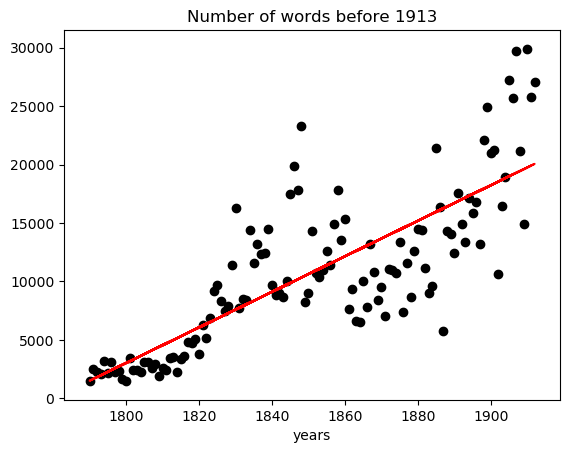

In [ ]:
plt.plot(year_before, fitted_word_before, color = 'red')
plt.scatter(year_before, num_word_before, color = 'black')
plt.xlabel("years")
plt.title("Number of words before 1913")

Text(0.5, 1.0, 'Number of words after 1913')

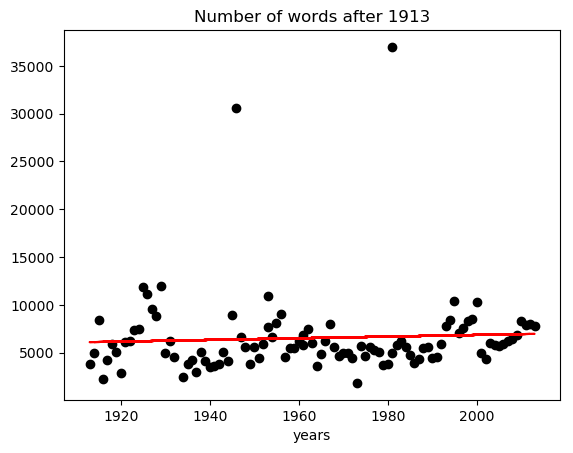

In [ ]:
plt.plot(year_after, fitted_word_after, color = 'red')
plt.scatter(year_after, num_word_after, color = 'black')
plt.xlabel("years")
plt.title("Number of words after 1913")

We see that while the word amount shows a strong increase over the years before 1912, the increase is very moderate after 1912 to present. The possible explanation might be again related to the change of format of how the SOU was deliverd. During the years of 1801 - 1912, the SOU was text format and was sent to be read by Congress each year and we saw that the length of text increased sharply. However after 1913 the SOU was then read as a speech to Congress and it makes sense that the speech shouldn't take too much time and thus the length reduced. We see outliers and it might be that a few predisents chose to return to the written format such as Jimmy Carter in 1981.